# Linear Algebra Essentials for Geophysical Inverse Theory

## Key Concepts

### 1. Matrices and Vectors
- **Forward operator (G)**: Maps model parameters to predicted data
  $$ \mathbf{d} = \mathbf{G}\mathbf{m} $$
- **Model vector (m)**: Contains unknown parameters we seek
- **Data vector (d)**: Contains measurements
- **System dimensions**: G is m × n matrix
  - m = number of data points
  - n = number of model parameters

### 2. Important Matrix Properties
- **Rank**: Number of linearly independent rows/columns
- **Condition number**: $\kappa = \sigma_{\text{max}}/\sigma_{\text{min}}$
  - Measures sensitivity to perturbations
  - Large κ indicates ill-conditioning
- **Determinant**: Measures volume transformation
- **Trace**: Sum of diagonal elements

### 3. Essential Decompositions
#### Singular Value Decomposition (SVD)
$$ \mathbf{G} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^T $$
- U: Left singular vectors (data space)
- V: Right singular vectors (model space)
- Σ: Diagonal matrix of singular values
- Key for understanding resolution and uncertainty

#### Eigenvalue Decomposition
$$ \mathbf{G} = \mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^T \text{ (for symmetric matrices)} $$
- Important for covariance matrices
- Basis for Principal Component Analysis

### 4. Key Subspaces
- **Null space**: $\{\mathbf{m} | \mathbf{G}\mathbf{m} = \mathbf{0}\}$
  - Non-uniqueness source
  - Critical in underdetermined problems
- **Range space**: Possible data vectors
- **Row space**: Model combinations
- **Column space**: Achievable predictions

### 5. Solution Methods
#### Overdetermined Systems (m > n)
$$ \mathbf{m} = (\mathbf{G}^T \mathbf{G})^{-1} \mathbf{G}^T \mathbf{d} \text{ (Least squares)} $$

#### Underdetermined Systems (n > m)
$$ \mathbf{m} = \mathbf{G}^T (\mathbf{G}\mathbf{G}^T)^{-1} \mathbf{d} \text{ (Minimum norm)} $$

#### Regularized Solutions
$$ \mathbf{m} = (\mathbf{G}^T \mathbf{G} + \lambda\mathbf{I})^{-1} \mathbf{G}^T \mathbf{d} \text{ (Tikhonov)} $$

### 6. Resolution and Uncertainty
- **Model Resolution**: $\mathbf{R} = \mathbf{G}^{-1}\mathbf{G}$
- **Data Resolution**: $\mathbf{N} = \mathbf{G}\mathbf{G}^{-1}$
- **Posterior Covariance**: $\mathbf{C}_m = \sigma^2(\mathbf{G}^T \mathbf{G})^{-1}$

### 7. Common Problem Types
1. **Overdetermined**
   - More data than unknowns
   - Least squares solution
   - Focus on data fit

2. **Underdetermined**
   - More unknowns than data
   - Non-unique solutions
   - Need regularization

3. **Mixed-determined**
   - Common in practice
   - Some parameters well-constrained
   - Others poorly determined

### 8. Regularization Approaches
1. **Tikhonov (Ridge)**
   $$ \text{minimize } \|\mathbf{G}\mathbf{m} - \mathbf{d}\|^2 + \lambda\|\mathbf{m}\|^2 $$

2. **Truncated SVD**
   - Filter small singular values
   - Stabilize solution

3. **Weighted Regularization**
   $$ \text{minimize } \|\mathbf{G}\mathbf{m} - \mathbf{d}\|^2_{\mathbf{C}_d^{-1}} + \|\mathbf{m}\|^2_{\mathbf{C}_m^{-1}} $$

# Homogeneous Systems and Row Reduction

## Homogeneous System
A system of linear equations $\mathbf{G}\mathbf{x} = \mathbf{0}$ where:
$$ \begin{bmatrix} 
g_{11} & g_{12} & \cdots & g_{1n} \\
g_{21} & g_{22} & \cdots & g_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
g_{m1} & g_{m2} & \cdots & g_{mn}
\end{bmatrix}
\begin{bmatrix} 
x_1 \\ x_2 \\ \vdots \\ x_n
\end{bmatrix} = 
\begin{bmatrix} 
0 \\ 0 \\ \vdots \\ 0
\end{bmatrix} $$

## Examples Using RREF (Row Reduced Echelon Form)

### 1. Unique Solution (Only Trivial Solution)
Consider:
$$ \begin{bmatrix} 
2 & 1 \\
1 & 1
\end{bmatrix}
\begin{bmatrix} 
x_1 \\ x_2
\end{bmatrix} = 
\begin{bmatrix} 
0 \\ 0
\end{bmatrix} $$

RREF:
$$ \begin{bmatrix} 
1 & 0 \\
0 & 1
\end{bmatrix} $$

Solution: $x_1 = x_2 = 0$ (trivial solution)

### 2. Infinite Solutions (Non-trivial Null Space)
Consider:
$$ \begin{bmatrix} 
1 & 2 & 4 \\
2 & 4 & 8
\end{bmatrix}
\begin{bmatrix} 
x_1 \\ x_2 \\ x_3
\end{bmatrix} = 
\begin{bmatrix} 
0 \\ 0
\end{bmatrix} $$

RREF:
$$ \begin{bmatrix} 
1 & 2 & 4 \\
0 & 0 & 0
\end{bmatrix} $$

Solution: $x_1 = -2t - 4s$, $x_2 = t$, $x_3 = s$ where $t,s$ are free parameters

### 3. No Solution (Inconsistent System)
Note: Homogeneous systems always have at least the trivial solution, but for completeness, consider the non-homogeneous case:
$$ \begin{bmatrix} 
1 & 2 \\
2 & 4
\end{bmatrix}
\begin{bmatrix} 
x_1 \\ x_2
\end{bmatrix} = 
\begin{bmatrix} 
1 \\ 3
\end{bmatrix} $$

RREF:
$$ \begin{bmatrix} 
1 & 2 \\
0 & 0
\end{bmatrix} \quad | \quad
\begin{bmatrix} 
1 \\ 1
\end{bmatrix} $$

No solution exists (inconsistent system)

## Key Points
1. Homogeneous systems always have the trivial solution ($\mathbf{x} = \mathbf{0}$)
2. Non-trivial solutions exist if and only if $\text{rank}(\mathbf{G}) < n$
3. Number of free parameters = $n - \text{rank}(\mathbf{G})$
4. RREF reveals:
   - Pivot columns: basic variables
   - Non-pivot columns: free parameters
   - Zero rows: linear

# Matrix Rank and Solution Spaces

## Definition of Rank
- **Row Rank**: Number of linearly independent rows
- **Column Rank**: Number of linearly independent columns
- **Theorem**: Row rank = Column rank = Rank of matrix

## Rank and System Solutions
For a system $\mathbf{G}\mathbf{m} = \mathbf{d}$ where G is m × n:

### 1. Full Column Rank
When $\text{rank}(\mathbf{G}) = n$:
- All columns are linearly independent
- Null space contains only zero vector
- If m > n: Unique least squares solution
- If m = n: Unique exact solution

### 2. Rank Deficient
When $\text{rank}(\mathbf{G}) < n$:
- Some columns are linearly dependent
- Non-trivial null space exists
- Infinite solutions differing by null space vectors
- Dimension of solution space = $n - \text{rank}(\mathbf{G})$

## Practical Examples

### Full Rank Case
$$ \mathbf{G} = \begin{bmatrix} 
1 & 0 \\
0 & 1
\end{bmatrix} $$
- $\text{rank}(\mathbf{G}) = 2$
- Unique solution exists
- No free parameters

### Rank Deficient Case
$$ \mathbf{G} = \begin{bmatrix} 
1 & 2 & 4 \\
2 & 4 & 8
\end{bmatrix} $$
- $\text{rank}(\mathbf{G}) = 1$
- Infinite solutions
- Two free parameters ($3 - 1$)

## Connection to SVD
$$ \mathbf{G} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^T $$
- Rank = Number of non-zero singular values
- Small singular values indicate near rank deficiency
- Condition number = $\sigma_{\text{max}}/\sigma_{\text{min}}$

## Implications for Inverse Problems
1. **Full Rank**: 
   - Well-determined parameters
   - Stable solutions
   
2. **Rank Deficient**:
   - Need regularization
   - Parameter trade-offs exist
   - Solution non-uniqueness

3. **Nearly Rank Deficient**:
   - Ill-conditioned problem
   - Solutions sensitive to data errors
   - May need stabilization

# Linear Dependence of Matrix Columns

## Definition
A set of vectors (columns) is linearly dependent if one vector can be expressed as a linear combination of the others:

$$ \mathbf{a}_j = \sum_{i \neq j} c_i \mathbf{a}_i $$

where $c_i$ are scalar coefficients.

## Matrix Perspective
For a matrix $\mathbf{G}$, its columns $[\mathbf{g}_1, \mathbf{g}_2, ..., \mathbf{g}_n]$ are linearly dependent if there exists a non-zero vector $\mathbf{x}$ such that:

$$ \mathbf{G}\mathbf{x} = \mathbf{0} $$

## Implications for Inverse Problems

### 1. Rank Deficiency
- If columns are linearly dependent, matrix is rank deficient
- $\text{rank}(\mathbf{G}) < n$ where n is number of columns

### 2. Non-unique Solutions
For the system $\mathbf{G}\mathbf{m} = \mathbf{d}$:
- If $\mathbf{m}_1$ is a solution
- And $\mathbf{G}\mathbf{x} = \mathbf{0}$
- Then $\mathbf{m}_2 = \mathbf{m}_1 + \mathbf{x}$ is also a solution

### 3. Null Space
- Linear dependence creates a non-trivial null space
- $\text{null}(\mathbf{G}) = \{\mathbf{x} | \mathbf{G}\mathbf{x} = \mathbf{0}\}$
- Dimension of null space = $n - \text{rank}(\mathbf{G})$

## Example
Consider the matrix:

$$ \mathbf{G} = \begin{bmatrix} 
1 & 2 & 4 \\
2 & 4 & 8 \\
3 & 6 & 12
\end{bmatrix} $$

The third column is linearly dependent:
$$ \mathbf{g}_3 = 2\mathbf{g}_1 = \mathbf{g}_2 $$

## Practical Significance
1. **Parameter Resolution**
   - Linear dependence means parameters cannot be resolved independently
   - Multiple parameter combinations give same data fit

2. **Solution Strategy**
   - Need regularization or additional constraints
   - Consider parameter transformations
   - May need to reduce number of model parameters

In [ ]:
### Linear Algebra Primer
# This script analyzes homogeneous systems of linear equations of the form Gx = 0.
# It demonstrates cases with full rank and rank deficiency, showing the implications for solution spaces.
import numpy as np
from sympy import Matrix
import matplotlib.pyplot as plt

def analyze_homogeneous_system(G, case_name):
    """Analyze a homogeneous system Gx = 0"""
    print(f"\n{case_name}")
    print("Original matrix G:")
    print(G)
    
    # Convert to SymPy matrix for RREF
    M = Matrix(G)
    rref_matrix, pivot_columns = M.rref()
    
    print("\nReduced Row Echelon Form:")
    print(np.array(rref_matrix).astype(float))
    
    # Compute rank
    rank = np.linalg.matrix_rank(G)
    n = G.shape[1]  # number of columns
    
    print(f"\nRank: {rank}")
    print(f"Number of free parameters: {n - rank}")
    
    # Analyze solution space
    if rank == n:
        print("Solution: Only trivial solution (x = 0)")
    elif rank < n:
        print(f"Solution: Infinite solutions with {n-rank} free parameters")
        
    # Compute and display null space basis
    U, s, Vh = np.linalg.svd(G)
    null_space = Vh[rank:].T
    if null_space.size > 0:
        print("\nNull space basis vectors:")
        print(null_space)

# Example 1: Full rank system (only trivial solution)
G1 = np.array([
    [2, 1],
    [1, 1]
])

# Example 2: Rank deficient system (infinite solutions)
G2 = np.array([
    [1, 2, 4],
    [2, 4, 8]
])

# Example 3: Another rank deficient system
G3 = np.array([
    [1, 2, 2, 4],
    [2, 4, 4, 8],
    [3, 6, 6, 12]
])

# Analyze each system
analyze_homogeneous_system(G1, "Case 1: Full Rank System")
analyze_homogeneous_system(G2, "Case 2: Rank Deficient System")
analyze_homogeneous_system(G3, "Case 3: Highly Rank Deficient System")



Case 1: Full Rank System
Original matrix G:
[[2 1]
 [1 1]]

Reduced Row Echelon Form:
[[1. 0.]
 [0. 1.]]

Rank: 2
Number of free parameters: 0
Solution: Only trivial solution (x = 0)

Case 2: Rank Deficient System
Original matrix G:
[[1 2 4]
 [2 4 8]]

Reduced Row Echelon Form:
[[1. 2. 4.]
 [0. 0. 0.]]

Rank: 1
Number of free parameters: 2
Solution: Infinite solutions with 2 free parameters

Null space basis vectors:
[[-9.75900073e-01 -1.79201128e-16]
 [ 9.75900073e-02 -8.94427191e-01]
 [ 1.95180015e-01  4.47213595e-01]]

Case 3: Highly Rank Deficient System
Original matrix G:
[[ 1  2  2  4]
 [ 2  4  4  8]
 [ 3  6  6 12]]

Reduced Row Echelon Form:
[[1. 2. 2. 4.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Rank: 1
Number of free parameters: 3
Solution: Infinite solutions with 3 free parameters

Null space basis vectors:
[[ 9.79795897e-01 -2.38260450e-16 -6.89575687e-17]
 [-8.16496581e-02  9.12870929e-01 -3.17787030e-17]
 [-8.16496581e-02 -1.82574186e-01 -8.94427191e-01]
 [-1.63299316e-01 -3.65148


Inconsistent System Example
Original system:
Matrix G =
[[1 2]
 [2 4]]
Vector d = [1 3]

Reduced Row Echelon Form [G|d]:
[[1. 2. 0.]
 [0. 0. 1.]]

Rank of G: 1
Rank of augmented matrix: 2
System is inconsistent - NO SOLUTION EXISTS


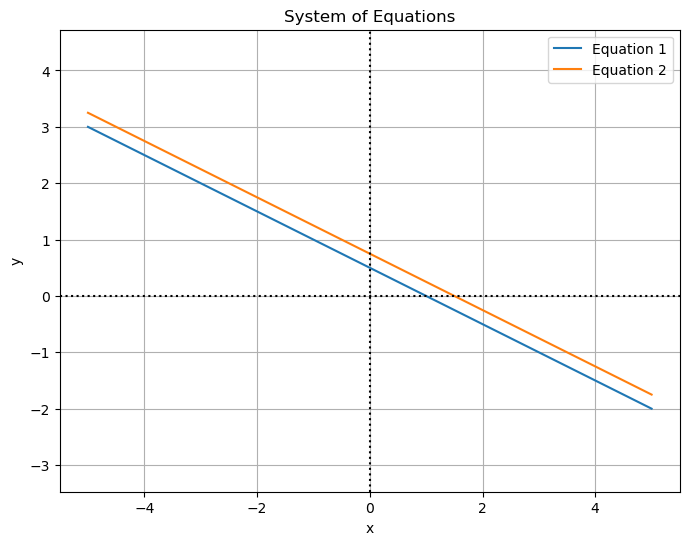


Why no solution exists:
1. Second equation is 2× first equation
2. But right-hand side 3 ≠ 2×1
3. Lines are parallel - never intersect


In [6]:
def analyze_linear_system(G, d, case_name):
    """Analyze a linear system Gx = d"""
    print(f"\n{case_name}")
    print("Original system:")
    print(f"Matrix G =\n{G}")
    print(f"Vector d = {d}")
    
    # Augmented matrix [G|d]
    aug = np.column_stack([G, d])
    
    # Convert to SymPy matrix for RREF
    M = Matrix(aug)
    rref_matrix, pivot_columns = M.rref()
    
    print("\nReduced Row Echelon Form [G|d]:")
    print(np.array(rref_matrix).astype(float))
    
    # Compute ranks
    rank_G = np.linalg.matrix_rank(G)
    rank_aug = np.linalg.matrix_rank(aug)
    
    print(f"\nRank of G: {rank_G}")
    print(f"Rank of augmented matrix: {rank_aug}")
    
    # Check consistency
    if rank_G < rank_aug:
        print("System is inconsistent - NO SOLUTION EXISTS")
    else:
        print("System is consistent - solution exists")

# Example of inconsistent system
G = np.array([
    [1, 2],  # First equation:  x + 2y = 1
    [2, 4],  # Second equation: 2x + 4y = 3
])

d = np.array([1, 3])

# Visualize the equations
def plot_system(G, d):
    plt.figure(figsize=(8, 6))
    x = np.linspace(-5, 5, 100)
    
    # Plot each equation
    for i in range(G.shape[0]):
        y = (d[i] - G[i,0]*x) / G[i,1]
        plt.plot(x, y, label=f'Equation {i+1}')
    
    plt.grid(True)
    plt.axhline(y=0, color='k', linestyle=':')
    plt.axvline(x=0, color='k', linestyle=':')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('System of Equations')
    plt.legend()
    plt.axis('equal')
    plt.show()

# Analyze and visualize
analyze_linear_system(G, d, "Inconsistent System Example")
plot_system(G, d)

# Explanation of why no solution exists:
print("\nWhy no solution exists:")
print("1. Second equation is 2× first equation")
print("2. But right-hand side 3 ≠ 2×1")
print("3. Lines are parallel - never intersect")

# Matrix Inverse

## Definition
For a square matrix $\mathbf{A}$, its inverse $\mathbf{A}^{-1}$ is the unique matrix such that:

$$ \mathbf{A}\mathbf{A}^{-1} = \mathbf{A}^{-1}\mathbf{A} = \mathbf{I} $$

where $\mathbf{I}$ is the identity matrix.

## Properties
1. **Existence**: A matrix has an inverse if and only if it is:
   - Square (n × n)
   - Full rank (determinant ≠ 0)

2. **Uniqueness**: If an inverse exists, it is unique

3. **Key Properties**:
   - $(\mathbf{A}^{-1})^{-1} = \mathbf{A}$
   - $(\mathbf{A}\mathbf{B})^{-1} = \mathbf{B}^{-1}\mathbf{A}^{-1}$
   - $\det(\mathbf{A}^{-1}) = \frac{1}{\det(\mathbf{A})}$

## Example
Consider the matrix:

$$ \mathbf{A} = \begin{bmatrix} 
2 & 1 \\
1 & 1
\end{bmatrix} $$

Its inverse is:

$$ \mathbf{A}^{-1} = \begin{bmatrix} 
1 & -1 \\
-1 & 2
\end{bmatrix} $$

Verification:

$$ \mathbf{A}\mathbf{A}^{-1} = \begin{bmatrix}
2 & 1 \\
1 & 1
\end{bmatrix}
\begin{bmatrix}
1 & -1 \\
-1 & 2
\end{bmatrix} =
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix} $$

## Application in Linear Systems
For a system $\mathbf{A}\mathbf{x} = \mathbf{b}$:
- If $\mathbf{A}^{-1}$ exists, the unique solution is:
$$ \mathbf{x} = \mathbf{A}^{-1}\mathbf{b} $$

# Vector Subspaces

## Definition
A subset $\mathbf{W}$ of $\mathbb{R}^n$ is a subspace if and only if:

1. **Zero Vector**: $\mathbf{0} \in \mathbf{W}$
2. **Closure under Addition**: If $\mathbf{x}, \mathbf{y} \in \mathbf{W}$, then $\mathbf{x} + \mathbf{y} \in \mathbf{W}$
3. **Closure under Scalar Multiplication**: If $\mathbf{x} \in \mathbf{W}$ and $c \in \mathbb{R}$, then $c\mathbf{x} \in \mathbf{W}$

## Examples

### 1. Null Space
For matrix $\mathbf{A}$:
$$ \text{null}(\mathbf{A}) = \{\mathbf{x} \in \mathbb{R}^n | \mathbf{A}\mathbf{x} = \mathbf{0}\} $$

### 2. Column Space
$$ \text{col}(\mathbf{A}) = \{\mathbf{A}\mathbf{x} | \mathbf{x} \in \mathbb{R}^n\} $$

### 3. Plane Through Origin
The plane $ax + by + cz = 0$ in $\mathbb{R}^3$

## Properties
1. **Dimension**: $\dim(\mathbf{W}) \leq n$
2. **Basis**: Set of linearly independent vectors that span $\mathbf{W}$
3. **Direct Sum**: If $\mathbf{W}_1 \cap \mathbf{W}_2 = \{\mathbf{0}\}$, then:
   $$ \mathbf{W} = \mathbf{W}_1 \oplus \mathbf{W}_2 $$

## Significance in Inverse Problems
- Null space: Source of non-uniqueness
- Range space: Achievable data predictions
- Row space: Observable parameter combinations

# Basis of a Vector Space

## Definition
A basis of a vector space $\mathbf{W}$ is a set of vectors $\{\mathbf{b}_1, \mathbf{b}_2, ..., \mathbf{b}_k\}$ that are:
1. **Linearly Independent**: No vector can be written as a linear combination of others
2. **Spanning**: Every vector in $\mathbf{W}$ can be written as a linear combination of basis vectors

$$ \mathbf{w} = c_1\mathbf{b}_1 + c_2\mathbf{b}_2 + ... + c_k\mathbf{b}_k $$

## Properties
- **Uniqueness of Representation**: Each vector has a unique representation in terms of basis vectors
- **Dimension**: Number of vectors in a basis = dimension of space
- **Change of Basis**: Different bases can represent same space

## Example: $\mathbb{R}^2$

### Standard Basis
$$ \mathbf{e}_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad \mathbf{e}_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix} $$

Any vector $\mathbf{v} \in \mathbb{R}^2$ can be written uniquely as:
$$ \begin{bmatrix} x \\ y \end{bmatrix} = x\mathbf{e}_1 + y\mathbf{e}_2 $$

### Alternative Basis
Consider:
$$ \mathbf{b}_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}, \quad \mathbf{b}_2 = \begin{bmatrix} 1 \\ -1 \end{bmatrix} $$

These vectors form a basis because they are:
1. Linearly independent (not parallel)
2. Span $\mathbb{R}^2$ (reach any point in plane)

For example, the vector $\begin{bmatrix} 3 \\ 1 \end{bmatrix}$ can be written as:
$$ \begin{bmatrix} 3 \\ 1 \end{bmatrix} = 2\mathbf{b}_1 + \mathbf{b}_2 = 2\begin{bmatrix} 1 \\ 1 \end{bmatrix} + \begin{bmatrix} 1 \\ -1 \end{bmatrix} $$

## Application in Inverse Problems
- Basis of null space describes all possible non-unique solutions
- Basis of range space shows independent data measurements
- Choice of basis can simplify parameter estimation

# Eigenvalues and Eigenvectors

## Definition
For a square matrix $\mathbf{A}$, a non-zero vector $\mathbf{v}$ is an **eigenvector** with corresponding **eigenvalue** $\lambda$ if:

$$ \mathbf{A}\mathbf{v} = \lambda\mathbf{v} $$

This means that when matrix $\mathbf{A}$ acts on eigenvector $\mathbf{v}$, it only scales the vector by the factor $\lambda$ without changing its direction.

## Mathematical Properties

### Characteristic Equation
Eigenvalues are found by solving the characteristic equation:
$$ \det(\mathbf{A} - \lambda\mathbf{I}) = 0 $$

### Eigenvalue Decomposition
For an $n \times n$ matrix with $n$ linearly independent eigenvectors:
$$ \mathbf{A} = \mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{-1} $$

where:
- $\mathbf{Q}$ = matrix of eigenvectors as columns
- $\mathbf{\Lambda}$ = diagonal matrix of eigenvalues
- This decomposition exists for all symmetric matrices

## Importance in Geophysical Inverse Theory

### 1. **Covariance Matrix Analysis**
- **Principal Component Analysis (PCA)**: Eigenvectors of data covariance matrix reveal dominant patterns
- **Error Propagation**: Eigenvalues quantify variance in different directions
- **Data Compression**: Largest eigenvalues capture most information

### 2. **System Stability and Conditioning**
- **Matrix Conditioning**: Ratio of largest to smallest eigenvalue = condition number
- **Convergence Analysis**: Eigenvalues determine convergence rates of iterative methods
- **Stability Assessment**: Negative eigenvalues can indicate unstable systems

### 3. **Model Resolution**
- **Resolution Matrices**: Eigenvalues indicate how well different model parameters are resolved
- **Trade-off Analysis**: Eigenvectors show parameter combinations that trade off against each other
- **Uncertainty Quantification**: Small eigenvalues correspond to poorly constrained directions

### 4. **Regularization Design**
- **Optimal Smoothing**: Eigenvectors guide design of regularization operators
- **Anisotropic Constraints**: Different eigenvalues allow directional smoothing
- **Prior Information**: Eigenvectors can encode geological structure

## Applications in Practice

### Seismic Tomography
```
- Eigenvectors of resolution matrix show spatial averaging kernels
- Eigenvalues indicate degree of parameter averaging
- Small eigenvalues reveal unresolvable model features
```

### Gravity/Magnetic Inversion
```
- Covariance eigenanalysis identifies correlated model parameters  
- Dominant eigenvectors capture main geological trends
- Eigenvalue spectrum guides regularization parameter selection
```

### Joint Inversion
```
- Cross-covariance eigenvectors link different physical properties
- Eigenvalue ratios quantify coupling strength between datasets
- Shared eigenvectors enable consistent multi-physics models
```

## Key Insights

1. **Geometric Interpretation**: Eigenvectors are special directions where linear transformation only causes scaling
2. **Spectral Properties**: Set of eigenvalues (spectrum) characterizes fundamental matrix behavior
3. **Dimensionality Reduction**: Large eigenvalues identify most important data/model space directions
4. **Ill-conditioning Detection**: Very small eigenvalues signal near-singular behavior

Understanding eigenvalues and eigenvectors is crucial for:
- Assessing inverse problem difficulty
- Designing effective regularization
- Interpreting solution reliability
- Optimizing computational algorithms

In [ ]:
### Column Space Analysis -- this script analyzes the column space of a given matrix using multiple methods. 
import numpy as np
import sympy as sp
from scipy.linalg import orth

# Example matrix
A = np.array([[1, 2, 3],
              [2, 4, 6],
              [1, 3, 4],
              [0, 1, 1]])

print("Original Matrix A:")
print(A)
print(f"Shape: {A.shape}")

# Method 1: Using SVD to find column space basis
print("\n" + "="*50)
print("METHOD 1: Using SVD")
print("="*50)

U, s, Vh = np.linalg.svd(A, full_matrices=False)
rank = np.sum(s > 1e-10)  # numerical tolerance for rank
column_space_svd = U[:, :rank]

print(f"Rank of A: {rank}")
print("Column space basis vectors (from SVD):")
print(column_space_svd)

# Method 2: Using scipy's orth function
print("\n" + "="*50)
print("METHOD 2: Using scipy.linalg.orth")
print("="*50)

column_space_orth = orth(A)
print("Orthonormal basis for column space:")
print(column_space_orth)

# Method 3: Using sympy for exact computation
print("\n" + "="*50)
print("METHOD 3: Using SymPy (exact computation)")
print("="*50)

A_sp = sp.Matrix(A)
print("Matrix A (SymPy):")
sp.pprint(A_sp)

# Get column space using SymPy
column_space_sympy = A_sp.columnspace()
print("\nColumn space basis vectors (SymPy):")
for i, vec in enumerate(column_space_sympy):
    print(f"Basis vector {i+1}:")
    sp.pprint(vec)

# Method 4: Manual computation using RREF
print("\n" + "="*50)
print("METHOD 4: Manual computation using RREF")
print("="*50)

# Transpose to work with rows instead of columns
AT_sp = A_sp.T
rref_AT, pivot_cols = AT_sp.rref()

print("A^T (working with rows):")
sp.pprint(AT_sp)
print("\nRREF of A^T:")
sp.pprint(rref_AT)
print(f"Pivot columns: {pivot_cols}")

# Extract linearly independent columns from original matrix
independent_cols = [A[:, i] for i in pivot_cols]
print("\nLinearly independent columns from original matrix:")
for i, col in enumerate(independent_cols):
    print(f"Column {pivot_cols[i]}: {col}")

# Verification: Show that any vector in column space can be written
# as linear combination of basis vectors
print("\n" + "="*50)
print("VERIFICATION")
print("="*50)

# Take a linear combination of original columns
test_vector = 2*A[:, 0] + 3*A[:, 1] - A[:, 2]
print(f"Test vector (2*col1 + 3*col2 - col3): {test_vector}")

# Project test vector onto column space using orthonormal basis
projection = column_space_orth @ (column_space_orth.T @ test_vector)
print(f"Projection onto column space: {projection}")
print(f"Difference (should be ~0): {np.linalg.norm(test_vector - projection):.2e}")

# Show range/column space properties
print("\n" + "="*50)
print("COLUMN SPACE PROPERTIES")
print("="*50)
print(f"Dimension of column space: {rank}")
print(f"Dimension of ambient space: {A.shape[0]}")
print(f"Is test_vector in column space? {np.allclose(test_vector, projection)}")

# Example of vector NOT in column space
random_vector = np.random.randn(A.shape[0])
projection_random = column_space_orth @ (column_space_orth.T @ random_vector)
print(f"Random vector: {random_vector}")
print(f"Its projection onto column space: {projection_random}")
print(f"Distance from column space: {np.linalg.norm(random_vector - projection_random):.4f}")
print(f"Is random vector in column space? {np.allclose(random_vector, projection_random)}")

Original Matrix A:
[[1 2 3]
 [2 4 6]
 [1 3 4]
 [0 1 1]]
Shape: (4, 3)

METHOD 1: Using SVD
Rank of A: 2
Column space basis vectors (from SVD):
[[-0.37844136 -0.19646965]
 [-0.75688271 -0.39293929]
 [-0.51502873  0.52933917]
 [-0.13658737  0.72580881]]

METHOD 2: Using scipy.linalg.orth
Orthonormal basis for column space:
[[-0.37844136 -0.19646965]
 [-0.75688271 -0.39293929]
 [-0.51502873  0.52933917]
 [-0.13658737  0.72580881]]

METHOD 3: Using SymPy (exact computation)
Matrix A (SymPy):
⎡1  2  3⎤
⎢       ⎥
⎢2  4  6⎥
⎢       ⎥
⎢1  3  4⎥
⎢       ⎥
⎣0  1  1⎦

Column space basis vectors (SymPy):
Basis vector 1:
⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣0⎦
Basis vector 2:
⎡2⎤
⎢ ⎥
⎢4⎥
⎢ ⎥
⎢3⎥
⎢ ⎥
⎣1⎦

METHOD 4: Manual computation using RREF
A^T (working with rows):
⎡1  2  1  0⎤
⎢          ⎥
⎢2  4  3  1⎥
⎢          ⎥
⎣3  6  4  1⎦

RREF of A^T:
⎡1  2  0  -1⎤
⎢           ⎥
⎢0  0  1  1 ⎥
⎢           ⎥
⎣0  0  0  0 ⎦
Pivot columns: (0, 2)

Linearly independent columns from original matrix:
Column 0: [1 2 1 0]
Col

In [8]:
## This code uses null_space from scipy.linalg to find a baiss for the null space of a specified matrix
import numpy as np
from scipy.linalg import null_space

# Example matrix
A = np.array([[2, 4, 1],
              [0, 0, 0],
              [1, 2, 0]])

# Find the null space
ns = null_space(A)
print("Null space of A:")
print(ns)

# Verify: A @ ns should be close to zero
print("A @ null_space:")
print(np.round(A @ ns, decimals=8))

Null space of A:
[[ 8.94427191e-01]
 [-4.47213595e-01]
 [ 3.42688857e-17]]
A @ null_space:
[[-0.]
 [ 0.]
 [-0.]]


In [ ]:
import sympy as sp

# Define the matrix
A = sp.Matrix([[2, 4, 1],
               [0, 0, 0],
               [1, 2, 0]])

print("Original Matrix A:")
sp.pprint(A)

# Compute RREF (Reduced Row Echelon Form)
rref_matrix, pivot_columns = A.rref()
print("\nReduced Row Echelon Form (RREF):")
sp.pprint(rref_matrix)
print(f"Pivot columns: {pivot_columns}")

# Identify free variables (non-pivot columns)
n = A.cols  # number of columns
free_vars = [i for i in range(n) if i not in pivot_columns]
print(f"Free variables correspond to columns: {free_vars}")

# Construct null space basis manually from RREF
# For each free variable, create a basis vector
null_basis_manual = []
x1, x2, x3 = sp.symbols('x1 x2 x3')
variables = [x1, x2, x3]

print("\nConstructing null space basis from RREF:")
for free_col in free_vars:
    # Create a basis vector where the free variable = 1, others = 0
    basis_vector = [0] * n
    basis_vector[free_col] = 1
    
    # For each pivot row, solve for the basic variable
    for i, pivot_col in enumerate(pivot_columns):
        if i < rref_matrix.rows:
            # Extract coefficient of the free variable in this row
            coeff = rref_matrix[i, free_col]
            basis_vector[pivot_col] = -coeff
    
    null_basis_manual.append(sp.Matrix(basis_vector))
    print(f"Basis vector for free variable x{free_col+1}:")
    sp.pprint(sp.Matrix(basis_vector))

# Compare with SymPy's built-in nullspace method
print("\nComparison with SymPy's nullspace method:")
null_basis_sympy = A.nullspace()
for i, v in enumerate(null_basis_sympy):
    print(f"SymPy basis vector {i+1}:")
    sp.pprint(v)

# General solution
print("\nGeneral solution to Ax=0:")
if null_basis_manual:
    if len(null_basis_manual) == 1:
        c1 = sp.Symbol('c1')
        gen_sol = c1 * null_basis_manual[0]
    elif len(null_basis_manual) == 2:
        c1, c2 = sp.symbols('c1 c2')
        gen_sol = c1 * null_basis_manual[0] + c2 * null_basis_manual[1]
    else:
        params = [sp.Symbol(f'c{i+1}') for i in range(len(null_basis_manual))]
        gen_sol = sum(params[i] * null_basis_manual[i] for i in range(len(null_basis_manual)))
    
    sp.pprint(gen_sol)
    print("\nwhere c1, c2, ... are arbitrary constants")

# Verify one of the basis vectors
if null_basis_manual:
    print(f"\nVerification: A * (manual basis vector 1) =")
    result = A * null_basis_manual[0]
    sp.pprint(result)